In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Setup complete")

Setup complete


In [35]:
# lendo os dados do arquivo bruto que virá do cartãoSD do satélite
data_path = './brute_data/launch_telemetry.json'
telemetry_data = pd.read_json(data_path, convert_dates=True)

In [36]:
# mostrando os dados
telemetry_data

,giroscopio,acelerometro,equipe,pressao,payload,bateria,temperatura
0,"[0.0, 0.0, 0.0]","[0.11, 0.05, -1.09]",33,73566.17,"{'umidade': 56.22, 'altitude': 1.4638200000000...",50,27.07
1,"[0.0, 0.0, 0.0]","[0.2, -0.01, -1.05]",33,73566.17,"{'umidade': 45.64, 'altitude': 545.1381, 'ECO2...",50,27.07
2,"[-3.11, 0.5, -29.42]","[0.21, 0.01, -1.03]",33,80671.09,"{'umidade': 35.74, 'altitude': 1860.33, 'ECO2'...",50,26.26
3,"[7.63, -9.48, -55.57]","[0.19, -0.0, -1.04]",33,68460.99,"{'umidade': 18.14, 'altitude': 3166.707, 'ECO2...",50,21.07
4,"[8.23, -1.38, -47.96]","[0.2, 0.02, -1.02]",33,58870.29,"{'umidade': 17.36, 'altitude': 4332.344, 'ECO2...",50,16.11
...,...,...,...,...,...,...,...
59,"[-5.76, 1.49, 0.39]","[-1.0, -0.0, -0.02]",33,100232.60,"{'umidade': 43.46, 'altitude': 55.78369, 'ECO2...",50,37.27
60,"[-5.79, 1.34, 0.42]","[-1.0, -0.0, -0.01]",33,100238.20,"{'umidade': 43.24, 'altitude': 55.49039, 'ECO2...",50,36.53
61,"[-5.85, 1.46, 0.54]","[-1.0, 0.0, -0.02]",33,100245.30,"{'umidade': 43.91, 'altitude': 55.13633, 'ECO2...",50,36.59
62,"[-6.02, 0.37, -0.02]","[0.44, 0.14, -0.9500000000000001]",33,100248.60,"{'umidade': 43.06, 'altitude': 54.64222, 'ECO2...",50,36.09


In [37]:
# calcula a média dos valores dos gases poluentes
sum_tvoc = 0
sum_eco2 = 0

for index, row in telemetry_data.iterrows():
    sum_tvoc += row['payload']['TVOC']
    sum_eco2 += row['payload']['ECO2']

num_rows = len(telemetry_data)
average_tvoc = round(sum_tvoc / num_rows, 2)
average_eco2 = round(sum_eco2 / num_rows, 2)

print(f"média TVOC: {average_tvoc}")
print(f"média ECO2: {average_eco2}")

média TVOC: 29.19
média ECO2: 206.3


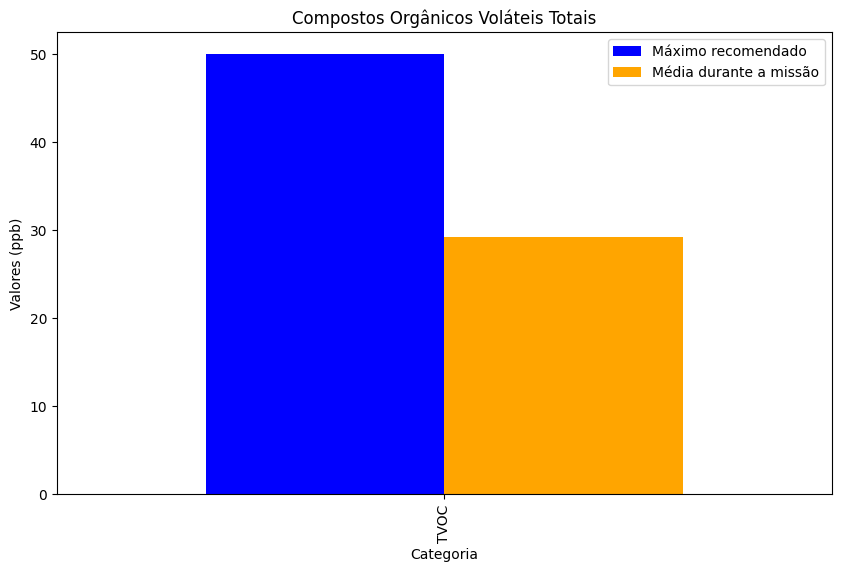

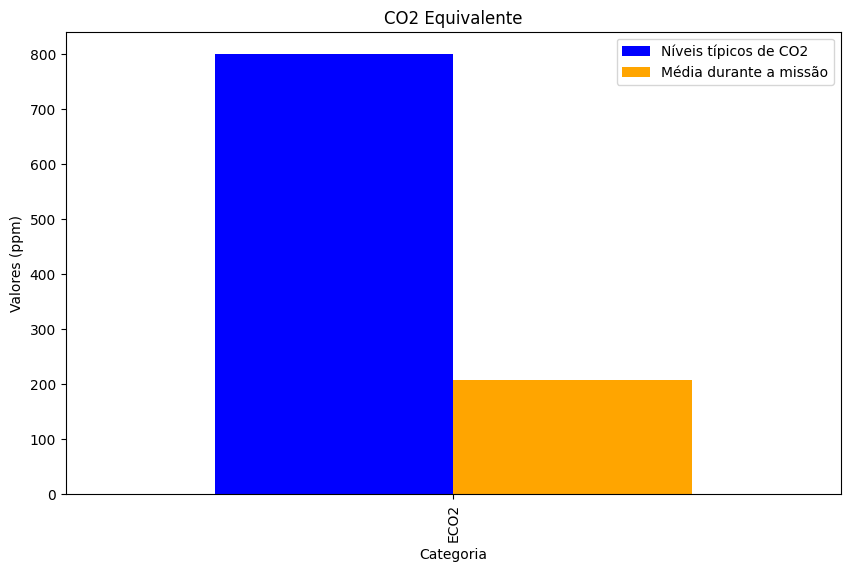

In [38]:
cor_esperado = 'blue'
cor_real = 'orange'

categorias = ( #categoria / valor esperado / valor real / unidade de media
    ["TVOC", 50, average_tvoc, "ppb"],
    ["ECO2", 800, average_eco2, "ppm"]
)

for item in categorias:
    # Cria um DataFrame com os dados
    average_data = pd.DataFrame({
        'Categoria': [item[0]],
        'Esperado': [item[1]],
        'Real': [item[2]]
    })
    
    # Seta a coluna 'Categoria' como index
    average_data.set_index('Categoria', inplace=True)
    
    # Plota o gráfico de barras
    ax = average_data.plot(kind='bar', color=[cor_esperado, cor_real], width=0.8, figsize=(10, 6))
    
    # Adiciona os labels e o título
    #plt.xlabel('Gases')
    plt.ylabel(f'Valores ({item[3]})')
    
    if (item[0] == "TVOC"):
        plt.title('Compostos Orgânicos Voláteis Totais')
        ax.legend(['Máximo recomendado', 'Média durante a missão'])
    elif (item[0] == "ECO2"):
        plt.title('CO2 Equivalente')
        ax.legend(['Níveis típicos de CO2', 'Média durante a missão'])

    
    # Mostra o gráfico
    plt.show()

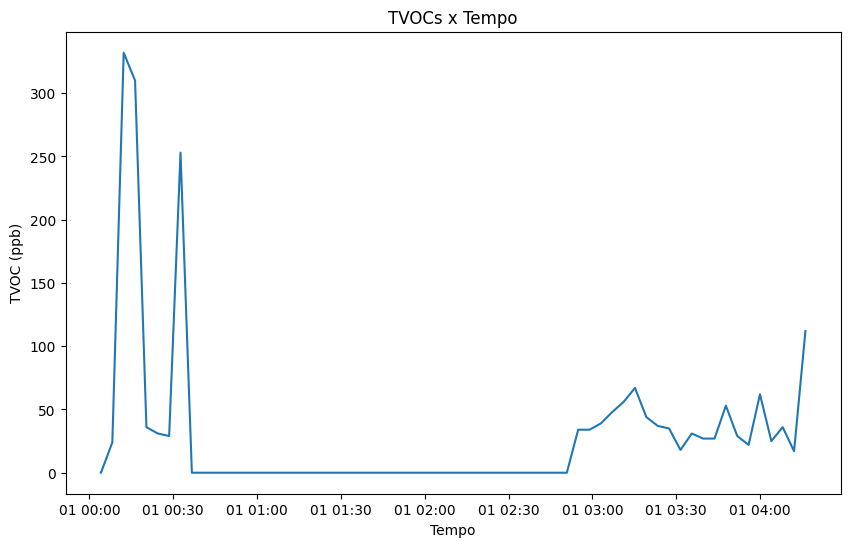

In [39]:
data = {
    'Valor': [],
    'Tempo': []
}

for item in telemetry_data['payload']:
    data['Valor'].append(item['TVOC'])
    data['Tempo'].append(pd.to_datetime(item['time'], unit='s'))

df_payload = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df_payload['Tempo'], df_payload['Valor'], marker='o', linestyle='-') # com ponto
plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')

# Adding labels and title
plt.xlabel('Tempo')
plt.ylabel('TVOC (ppb)')
plt.title('TVOCs x Tempo')

# Display the plot
plt.show()

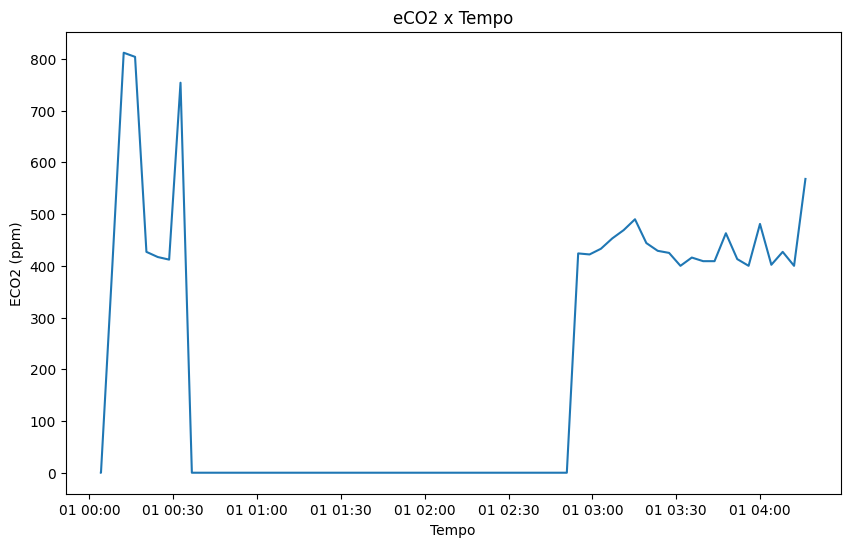

In [40]:
data = {
    'Valor': [],
    'Tempo': []
}

for item in telemetry_data['payload']:
    data['Valor'].append(item['ECO2'])
    data['Tempo'].append(pd.to_datetime(item['time'], unit='s'))

df_payload = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
#plt.plot(df_payload['Tempo'], df_payload['Valor'], marker='o', linestyle='-') # com ponto
plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')

# Adding labels and title
plt.xlabel('Tempo')
plt.ylabel('ECO2 (ppm)')
plt.title('eCO2 x Tempo')

# Display the plot
plt.show()

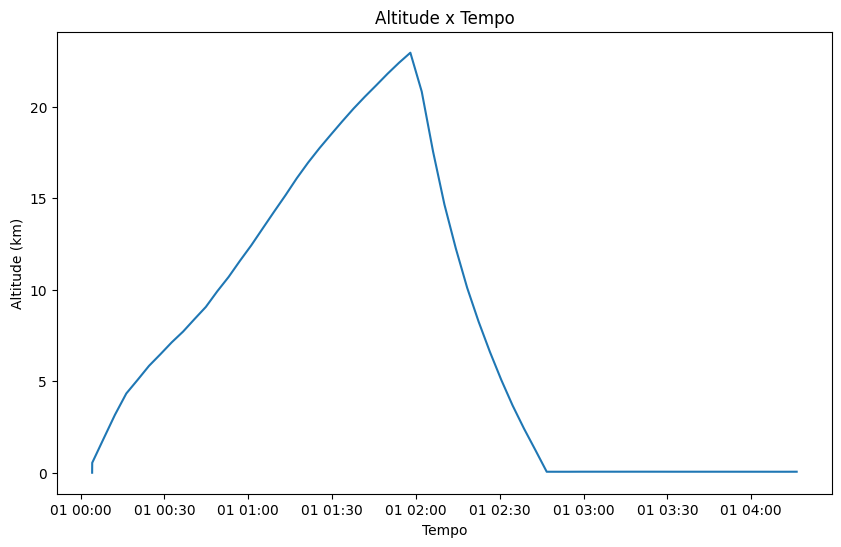

In [49]:
data = {
    'Valor': [],
    'Tempo': []
}

for item in telemetry_data['payload']:
    data['Valor'].append(item['altitude'] / 1000)
    data['Tempo'].append(pd.to_datetime(item['time'], unit='s'))

df_payload = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')

# Adding labels and title
plt.xlabel('Tempo')
plt.ylabel('Altitude (km)')
plt.title('Altitude x Tempo')

# Display the plot
plt.show()

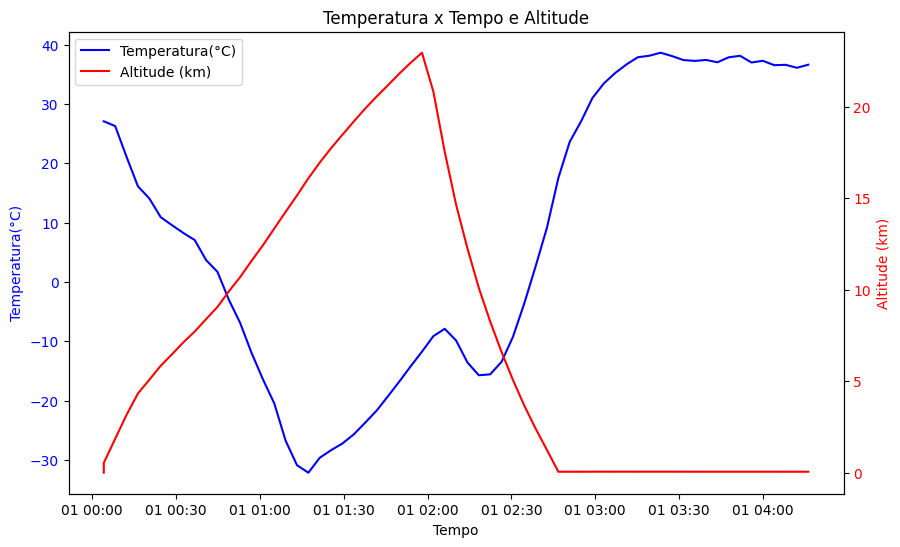

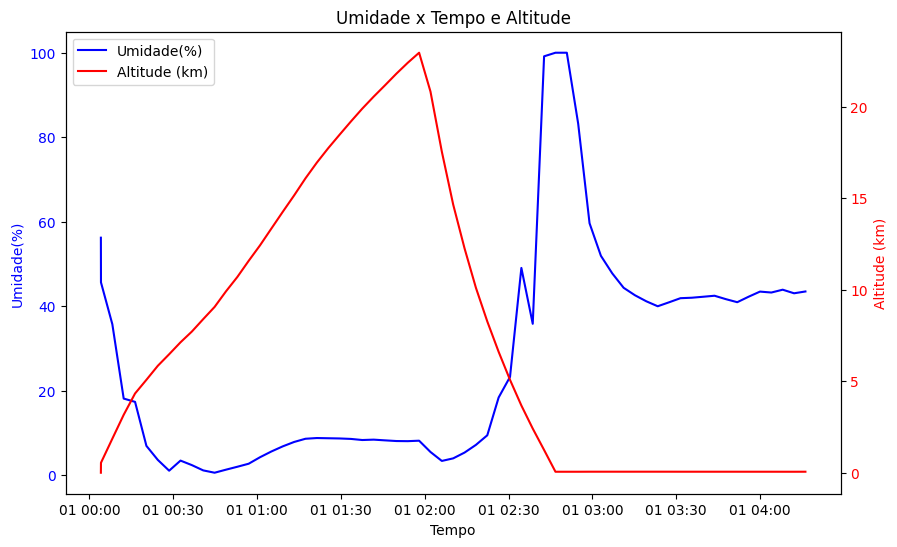

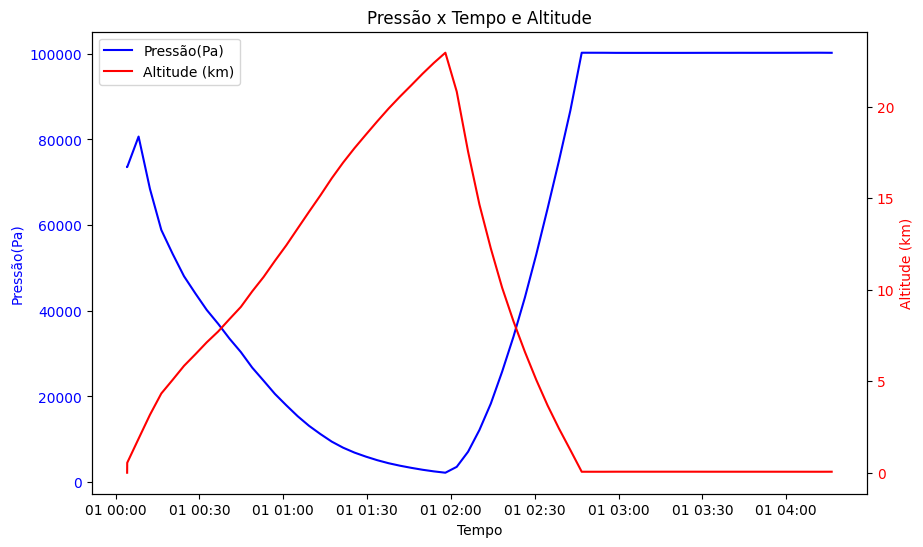

In [57]:
items = [
    {'title': "Temperatura x Tempo", 'key': "temperatura", 'ylabel': "Temperatura(°C)"},
    {'title': "Umidade x Tempo", 'key': "umidade", 'ylabel': "Umidade(%)"},
    {'title': "Bateria x Tempo", 'key': "bateria", 'ylabel': "Bateria(%)"},
    {'title': "Pressão x Tempo", 'key': "pressao", 'ylabel': "Pressão(Pa)"},
]

for item in items:
    if ('bateria' in item['title'].lower()): continue
    
    data = {
        'Valor': [],
        'Tempo': []
    }

    altitude_data = {
        'Altitude': [],
        'Tempo': []
    }

    for index, row in telemetry_data.iterrows():
        try:
            data['Valor'].append(row[item['key']])
        except KeyError:
            data['Valor'].append(row['payload'][item['key']])
        data['Tempo'].append(pd.to_datetime(row['payload']['time'], unit='s'))
        
        # Coletando dados da altitude
        altitude_data['Altitude'].append(row['payload']['altitude'] / 1000)
        altitude_data['Tempo'].append(pd.to_datetime(row['payload']['time'], unit='s'))

        
    
    df_payload = pd.DataFrame(data)
    df_altitude = pd.DataFrame(altitude_data)

    # Plotting
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot do eixo Y principal (seus dados existentes)
    ax1.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-', color='blue', label=item['ylabel'])
    ax1.set_xlabel('Tempo')
    ax1.set_ylabel(item['ylabel'], color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Criando o segundo eixo Y
    ax2 = ax1.twinx() 
    ax2.plot(df_altitude['Tempo'], df_altitude['Altitude'], linestyle='-', color='red', label='Altitude (km)')
    ax2.set_ylabel('Altitude (km)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Adicionando título
    plt.title(item['title'] + ' e Altitude')

    # Adicionando legendas para ambos os eixos
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    # Display the plot
    plt.show()


    '''
    # Plotting
    plt.figure(figsize=(10, 6))
    #plt.plot(df_payload['Tempo'], df_payload['Valor'], marker='o', linestyle='-') # com ponto
    plt.plot(df_payload['Tempo'], df_payload['Valor'], linestyle='-')
    
    # Adding labels and title
    plt.xlabel('Tempo')
    plt.ylabel(item['ylabel'])
    plt.title(item['title'])
    
    # Display the plot
    plt.show()
    '''